You are given a positive integer n, indicating that we initially have an n x n 0-indexed integer matrix mat filled with zeroes.

You are also given a 2D integer array query. For each query[i] = [row1i, col1i, row2i, col2i], you should do the following operation:

    Add 1 to every element in the submatrix with the top left corner (row1i, col1i) and the bottom right corner (row2i, col2i). That is, add 1 to mat[x][y] for all row1i <= x <= row2i and col1i <= y <= col2i.

Return the matrix mat after performing every query.

 

Example 1:

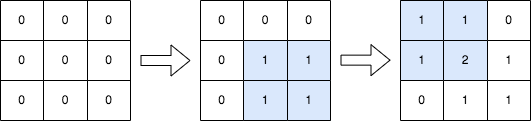

Input: n = 3, queries = [[1,1,2,2],[0,0,1,1]]
Output: [[1,1,0],[1,2,1],[0,1,1]]
Explanation: The diagram above shows the initial matrix, the matrix after the first query, and the matrix after the second query.
- In the first query, we add 1 to every element in the submatrix with the top left corner (1, 1) and bottom right corner (2, 2).
- In the second query, we add 1 to every element in the submatrix with the top left corner (0, 0) and bottom right corner (1, 1).

Example 2:

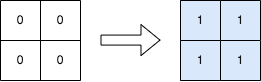

Input: n = 2, queries = [[0,0,1,1]]
Output: [[1,1],[1,1]]
Explanation: The diagram above shows the initial matrix and the matrix after the first query.
- In the first query we add 1 to every element in the matrix.

 

Constraints:

    1 <= n <= 500
    1 <= queries.length <= 104
    0 <= row1i <= row2i < n
    0 <= col1i <= col2i < n

 

In [ ]:
class Solution:
    def rangeAddQueries(self, n: int, queries: List[List[int]]) -> List[List[int]]:
        mat = [[0 for _ in range(n)] for _ in range(n)]
        for xl, yl, xr, yr in queries:
            for row in range(xl, xr + 1):
                mat[row][yl] += 1
                if yr + 1 < n:
                    mat[row][yr + 1] -= 1

        for row in mat:
            for i in range(1, n):
                row[i] += row[i - 1]
        return mat

In [ ]:
class Solution:
    def rangeAddQueries(
        self, n: int, queries: List[List[int]]
    ) -> List[List[int]]:
        diff = [[0] * (n + 1) for _ in range(n + 1)]
        for row1, col1, row2, col2 in queries:
            diff[row1][col1] += 1
            diff[row2 + 1][col1] -= 1
            diff[row1][col2 + 1] -= 1
            diff[row2 + 1][col2 + 1] += 1

        mat = [[0] * n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                x1 = 0 if i == 0 else mat[i - 1][j]
                x2 = 0 if j == 0 else mat[i][j - 1]
                x3 = 0 if i == 0 or j == 0 else mat[i - 1][j - 1]
                mat[i][j] = diff[i][j] + x1 + x2 - x3
        return mat